In [1]:
import sys
sys.path.append("../")
sys.path.append("../lib/")

sys.path

['c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64\\python36.zip',
 'c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64\\DLLs',
 'c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64\\lib',
 'c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64',
 '',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\win32',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\win32\\lib',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\Pythonwin',
 'c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64\\lib\\site-packages',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\IPython\\extensions',
 'C:\\Users\\Previato\\.ipython',
 '../',
 '../lib/']

In [2]:
import src.enviroment as enviroment
import src.pacman_problem as pacman
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from ghost_avoidance_heuristic import GhostAvoidanceHeuristic
# Needed to hide warnings in the matplotlib sections
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [3]:
maze_arqs = {'Mazes/TinyMaze01.txt':[30,28],
             'Mazes/SmallMaze01.txt':[30,84],
             'Mazes/SmallMaze02.txt':[30,56],
             'Mazes/MediumMaze01.txt':[60,56],
             'Mazes/MediumMaze02.txt':[60,112],
             'Mazes/BigMaze01.txt':[60,140],
             'Mazes/BigMaze02.txt':[90,140],
             'maze-test.txt':[28,28]}

In [4]:
maze_name = 'Mazes/BigMaze02.txt'
maze, initial_position, goal_position = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1])
print("Initial position: " + str(initial_position))
print("Goal position: " + str(goal_position))

Initial position: (-1, -1)
Goal position: (-1, -1)


In [5]:
if maze_name == 'Mazes/BigMaze02.txt':
    initial_position = (1, 15)
    goal_position = (59, 125)

In [6]:
def get_solution_info(node, expanded_nodes, food_nodes):
    print("Number of expanded nodes:")
    print(expanded_nodes)
    print("Number of expanded food nodes:")
    print(food_nodes)
    food_nodes_path = 0
    for n in node.path():
        food_nodes_path += problem.check_food(n.state)
    print("Number of nodes in the path:")
    print(len(node.path()))
    print("Number of food nodes in the path:")
    print(food_nodes_path)
    
    print("------------------------------------------------")
    
    print(node.solution())
    print("Path:")
    print(node.path())

In [7]:
def make_grid_plot(maze, initial_position, goal_position):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = colors.ListedColormap(['yellow', 'red', 'darkblue','gray','black'])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid)))
    ax.set_yticks(np.arange(len(grid[0])))
    ax.set_xticklabels(np.arange(0, len(grid), 1))
    ax.set_yticklabels(np.arange(0, len(grid[0]), 1))

    ax.set_xticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)


    ax.scatter(food_y, food_x, color = 'white', zorder=10)
    ax.scatter(initial_position[1], initial_position[0], marker='o', color='white',s=110)
    ax.scatter(goal_position[1], goal_position[0], marker='X', color='white', s=90)

    plt.show()

In [8]:
def make_path_plot(maze, initial_position, goal_position, node):    
    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = colors.ListedColormap(['yellow', 'red', 'purple', 'black'])

    grid, food_x, food_y = maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid)))
    ax.set_yticks(np.arange(len(grid[0])))
    ax.set_xticklabels(np.arange(0, len(grid), 1))
    ax.set_yticklabels(np.arange(0, len(grid[0]), 1))

    ax.set_xticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)


    ax.scatter(food_y, food_x, color = 'white', zorder=10)
    ax.scatter(initial_position[1], initial_position[0], marker='o', color='white',s=110)
    ax.scatter(goal_position[1], goal_position[0], marker='X', color='white', s=90)

    plt.show()

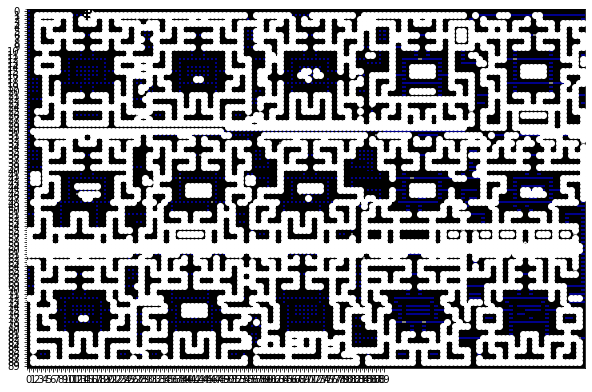

In [9]:
make_grid_plot(maze, initial_position, goal_position)

In [10]:
problem = pacman.PacmanProblem(maze, initial_position, goal_position)

# Breadth First Search - BFS

Number of expanded nodes:
2451
Number of expanded food nodes:
1823
Number of nodes in the path:
93
Number of food nodes in the path:
47
------------------------------------------------
[<Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>,

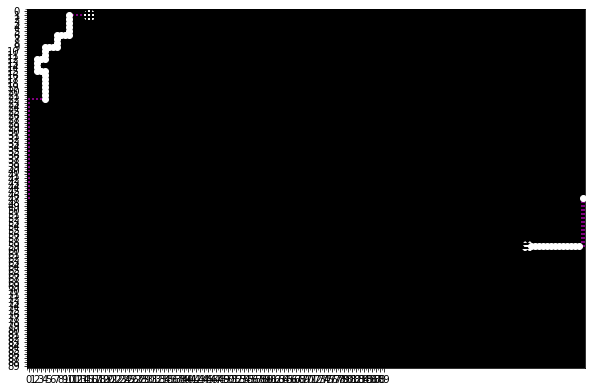

In [11]:
solution_node, expanded_nodes, food_nodes = pacman.breadth_first_graph_search(problem)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# Depth First Search - DFS

Number of expanded nodes:
853
Number of expanded food nodes:
681
Number of nodes in the path:
669
Number of food nodes in the path:
533
------------------------------------------------
[<Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Act

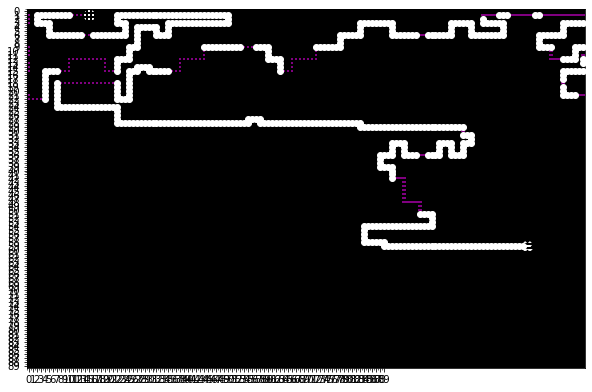

In [12]:
solution_node, expanded_nodes, food_nodes = pacman.depth_first_graph_search(problem)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# Greedy Search - Manhattan Distance

Number of expanded nodes:
342
Number of expanded food nodes:
253
Number of nodes in the path:
207
Number of food nodes in the path:
161
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT

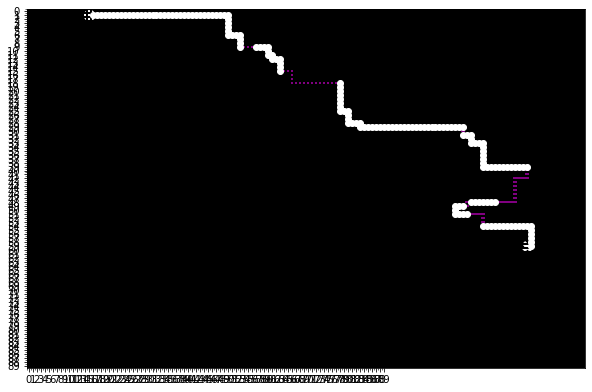

In [13]:
solution_node, expanded_nodes, food_nodes = pacman.greedy_best_first_search(problem)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# Greedy Search - Ghost Avoidance Heuristic with Euclidean Distance

In [14]:
problem_ghost = GhostAvoidanceHeuristic(maze, initial_position, goal_position, ghost_proximity_cost=1000)

Number of expanded nodes:
2690
Number of expanded food nodes:
2031
Number of nodes in the path:
455
Number of food nodes in the path:
312
------------------------------------------------
[<Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Act

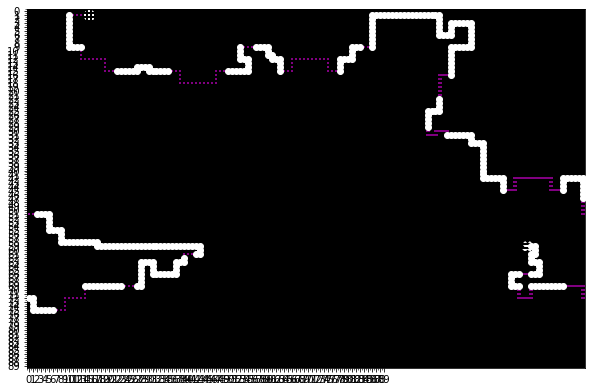

In [15]:
solution_node, expanded_nodes, food_nodes = pacman.greedy_best_first_search(problem, problem_ghost.h)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# A* Search - Manhattan Distance

Number of expanded nodes:
883
Number of expanded food nodes:
670
Number of nodes in the path:
169
Number of food nodes in the path:
131
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT

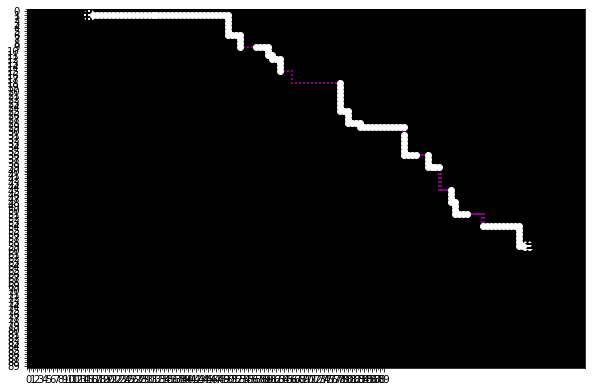

In [16]:
solution_node, expanded_nodes, food_nodes = pacman.a_star_best_first_search(problem)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# A* Search - Ghost Avoidance Heuristic with Euclidean Distance

In [17]:
problem_ghost = GhostAvoidanceHeuristic(maze, initial_position, goal_position, ghost_proximity_cost=1000)

Number of expanded nodes:
3254
Number of expanded food nodes:
2455
Number of nodes in the path:
283
Number of food nodes in the path:
199
------------------------------------------------
[<Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Act

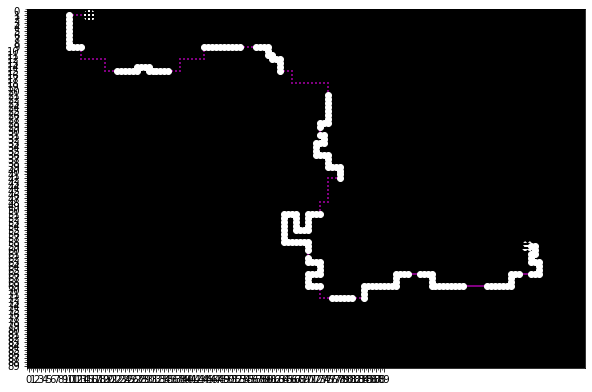

In [18]:
solution_node, expanded_nodes, food_nodes = pacman.a_star_best_first_search(problem, problem_ghost.h)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# A* Search - Shockwave Heuristic

In [19]:
maze, _, _ = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1], enviroment.ShockWaveMaze)
problem = pacman.PacmanProblem(maze, initial_position, goal_position)

In [20]:
def make_shockwave_grid_plot(maze, initial_position, goal_position):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(20, 20))
#     cmap = colors.ListedColormap(['yellow', 'red', 'darkblue','gray','black'])
    cmap = 'hot'

    im = ax.imshow(maze.shockwave_grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid)))
    ax.set_yticks(np.arange(len(grid[0])))
    ax.set_xticklabels(np.arange(0, len(grid), 1))
    ax.set_yticklabels(np.arange(0, len(grid[0]), 1))

    ax.set_xticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)


#     ax.scatter(food_y, food_x, color = 'white', zorder=10)
    ax.scatter(initial_position[1], initial_position[0], marker='o', color='white',s=110)
    ax.scatter(goal_position[1], goal_position[0], marker='X', color='white', s=90)

    plt.show()

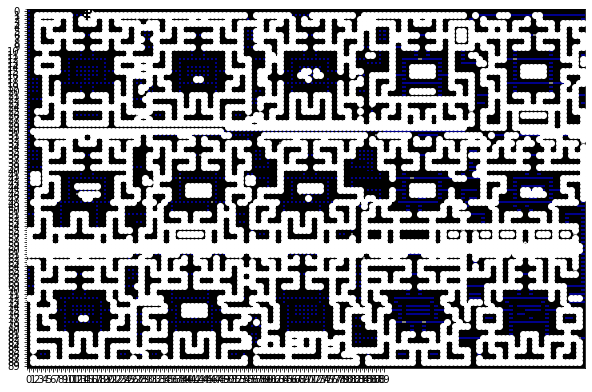

In [21]:
make_grid_plot(maze, initial_position, goal_position)

### The lighter, the further from the goal

In [23]:
maze.set_shockwave(goal_position)


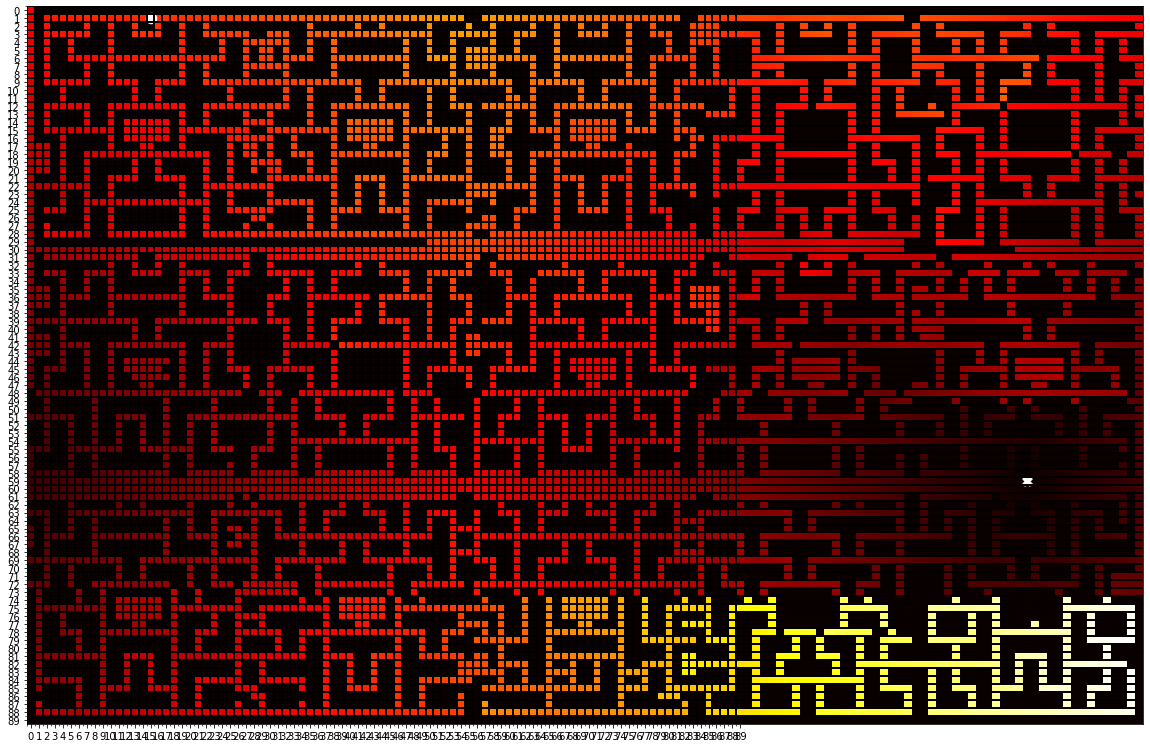

In [24]:
make_shockwave_grid_plot(maze, initial_position, goal_position)

Number of expanded nodes:
121
Number of expanded food nodes:
70
Number of nodes in the path:
93
Number of food nodes in the path:
62
------------------------------------------------
[<Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <A

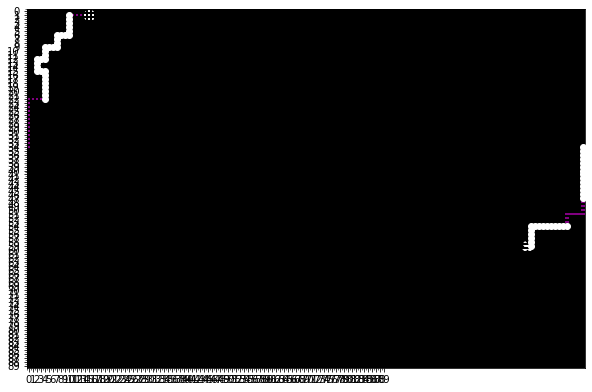

In [26]:
solution_node, expanded_nodes, food_nodes = pacman.a_star_best_first_search(problem, problem.h_shockwave)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)